In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [ ]:
df = pd.read_csv('heart.csv')
y = np.array(df['chd'])
X = df.drop(['chd'], axis=1)

map_dict = {'Present': 1, 'Absent':0}
X['famhist'] = X['famhist'].map(map_dict)
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_train.shape

In [ ]:
X_train

In [ ]:
pf = PolynomialFeatures(degree=3)

In [ ]:
pf.get_feature_names(X_train.columns)

In [ ]:
X_features = pf.fit_transform(X_train)

In [ ]:
X_features.shape

In [ ]:
def feature_names(selector):
    return np.array(pf.get_feature_names(X_train.columns))[selector.get_support()]

## Selekcja zmiennych

## SelectKBest

In [ ]:
chi2_selector = SelectKBest(chi2, k=20)

In [ ]:
chi2_selector.fit_transform(X_features, y_train)

In [ ]:
feature_names(chi2_selector)

### Mutual information

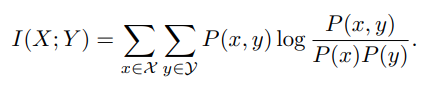

In [ ]:
mi_selector = SelectKBest(mutual_info_classif, k=20)
mi_selector.fit(X_features, y_train)

In [ ]:
feature_names(mi_selector)

### Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression()
rfe_selector = RFE(estimator, n_features_to_select=10, step=1)
rfe_selector = rfe_selector.fit(X_features, y_train) 

In [ ]:
feature_names(rfe_selector)

### Select From Model

In [ ]:
model_selector = SelectFromModel(
    LogisticRegression(penalty="l1", C=0.000025, solver="liblinear")
)

In [ ]:
model_selector.fit_transform(X_features, y_train)

In [ ]:
feature_names(model_selector)

### Aktywność na zajęciach
1. Przetestować 3 różne metryki do selekcji jednowymiarowej (wytrenować modele na 10 zmiennych najlepszych zmiennych i zobaczyć jak sobie radzą na teście)
2. Napisać algorytm l1 based feature selection

In [ ]:
params = (num_features)

bierzemy bardzo małe C
do (
trenujemy l1 z C
patrzymy które zmienne mają wagą > 0 
jak mniej niż num_features to powiększamy C
jak więcej to zmniejszamy C (możemy zmniejszyć też krok)
) while (ilość zmiennych z wagą >0 != num_features)